# ***VUELO SIN RETORNO : ANALISIS DE ACCIDENTES Y TENDENCIAS DESDE 1948***

### En el siguiente notebook veremos la siguiente informacion:
1) **Introduccion:** Veremos algunas definiciones importantes

1) **Objetivo:** Se plasma el objetivo que se tiene con este dataset.

1) **Hipotesis:** Declaracion de la hipotesis y su justificación.

1) **Preparación de los datos:** en este apartado veremos la importación de librerías junto con la base de datos y las subsiguientes transformaciones de la misma para su posterior análisis, en otras palabras la EXPLORACION Y LIMPIEZA DE DATOS.

1) **Análisis exploratorio de datos:** se realizará el análisis e investigación sobre el conjunto de datos presentado.



## Introduccion
Este dataset contiene la base de datos de eventos de seguridad de aviación de la NTSB, contiene información desde 1948 en adelante sobre accidentes de aviación civil e incidentes seleccionados dentro de los Estados Unidos, sus territorios y posesiones, asi como en aguas internacionales.
Se decide analizar los eventos de seguridad en aviacion debido a la perdida de vidas humanas y altos costos que estos generan, antes de abordar el tema debemos tener en cuenta definiciones importantes.


## NTSB - NATIONAL TRANSPORTATION SAFETY BOARD

La Junta Nacional de Seguridad en el Transporte (NTSB) es una agencia federal independiente en los Estados Unidos dedicada a investigar accidentes de transporte, incluidos los de aviación. Su papel y responsabilidades en la investigación de accidentes de aviación incluyen:

1. **Investigación de Accidentes**: La NTSB lleva a cabo investigaciones exhaustivas de accidentes de aviación para determinar las causas y contribuir a la prevención de futuros incidentes.

2. **Análisis de Datos**: Recopila y analiza datos de vuelo, testimonios de testigos y evidencia física del accidente para entender lo ocurrido.

3. **Emisión de Recomendaciones**: Tras las investigaciones, la NTSB emite recomendaciones para mejorar la seguridad en la aviación, dirigidas a diferentes organismos, como la Administración Federal de Aviación (FAA) y las aerolíneas.

4. **Colaboración Internacional**: Trabaja en conjunto con otras agencias y organizaciones internacionales en la investigación de accidentes que involucran aeronaves de diferentes países.

5. **Educación y Concienciación**: Publica informes y realiza presentaciones para informar al público y a la industria sobre las lecciones aprendidas de los accidentes investigados.

La NTSB desempeña un papel crucial en la mejora de la seguridad aérea y la prevención de accidentes futuros.

Accidente. Todo evento de seguridad relacionado con la utilización de una aeronave, que, en el caso de una aeronave tripulada, ocurre entre el momento en que una persona entra a bordo de la aeronave, con la intención de realizar un vuelo, y el momento en que todas las personas han desembarcado, o en el caso de una aeronave no tripulada, que ocurre entre el momento en que la aeronave está lista para desplazarse con el propósito de realizar un vuelo y el momento en que se detiene, al finalizar el vuelo, y se apaga su sistema de propulsión principal, durante el cual:
a) cualquier persona sufre lesiones mortales o graves a consecuencia de:
    hallarse en la aeronave, o
    por contacto directo con cualquier parte de la aeronave, incluso las partes que se hayan desprendido de la aeronave, o
    por exposición directa al chorro de un reactor,
excepto cuando las lesiones obedezcan a causas naturales, se las haya causado una persona a sí misma o hayan sido causadas por otras personas o se trate de lesiones sufridas por pasajeros clandestinos escondidos fuera de las áreas destinadas normalmente a los pasajeros y la tripulación; o
b) la aeronave sufre daños o roturas estructurales que:
    afectan adversamente su resistencia estructural, su performance o sus características de vuelo; y que normalmente exigen una reparación importante o el recambio del componente afectado,excepto por falla o daños del motor, cuando el daño se limita a un solo motor (incluido su capó o sus accesorios); hélices, extremos de ala, antenas, sondas, álabes, neumáticos, frenos, ruedas, carenas, paneles, puertas de tren de aterrizaje, parabrisas, revestimiento de la aeronave (como pequeñas abolladuras o perforaciones), o por daños a álabes del rotor principal, álabes del rotor compensador, tren de aterrizaje y a los que resulten de granizo o choques con aves (incluyendo perforaciones en el radomo) o
c) la aeronave desaparece o es totalmente inaccesible.

Incidente. Todo evento de seguridad relacionado con la utilización de una aeronave, que no llegue a ser un accidente, que afecte o pueda afectar la seguridad de las operaciones aereas.

# Objetivo: 
Desarrollar un análisis exhaustivo de los accidentes de aviación mediante la recopilación, limpieza y visualización de datos históricos, con el fin de identificar patrones y tendencias relacionadas con la frecuencia, causas, condiciones meteorológicas, tipo de aeronaves, y otros factores relevantes. El objetivo es proporcionar una base sólida para la toma de decisiones informadas, mejorar la seguridad aérea y apoyar el diseño de estrategias de prevención de accidentes.

# Hipótesis: 
Los accidentes aéreos en Estados Unidos son más frecuentes en condiciones de vuelo visual (VFR, por sus siglas en inglés) en comparación con condiciones de vuelo por instrumentos (IFR), y la mayor cantidad de accidentes ocurren durante las fases críticas del vuelo, específicamente durante el despegue, la aproximación y el aterrizaje.

### Justificación:
- La mayoría de los accidentes ocurren en buenas condiciones meteorológicas. En condiciones de buen tiempo, los pilotos pueden volverse complacientes, asumiendo que hay menos riesgos en comparación con las condiciones meteorológicas adversas. Esto puede llevar a una actitud relajada hacia los protocolos de seguridad y comportamientos potencialmente arriesgados, como volar a baja altitud, exceso de velocidad o acrobacias, lo que aumenta la probabilidad de accidentes
- Fases críticas del vuelo: Las fases de despegue, aproximación y aterrizaje son conocidas por ser las más complejas y peligrosas debido a la alta concentración de tareas que deben realizarse en corto periodo de tiempo, la proximidad al suelo y las maniobras que deben ejecutarse bajo condiciones específicas. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('datasets/AviationData.csv', encoding='latin1')
df1 = df.copy() # Hacemos una copia antes de cualquier cosa
df.head()

/tmp/ipykernel_19302/1281174875.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datasets/AviationData.csv', encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
print("Las filas y columnas del dataset son:",(df.shape))

Las filas y columnas del dataset son: (88889, 31)


## LIMPIEZA DE DATOS

In [6]:
#Vemos la informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [7]:
#Vamos a chequear el numero total de valores nulos
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [8]:
# Calculemos el porcentaje de valores nulos por columna
porcentaje = df.isna().mean() * 100
porcentaje

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

In [9]:
# Como la fase de vuelo es crucial para nuestro analisis vamos a establecer un umbral por encima de 35% para eliminar las columnas con nulos
umbral = 35
columnas_a_eliminar = porcentaje[porcentaje > umbral].index
df = df.drop(columns=columnas_a_eliminar)


In [10]:
#Eliminamos otras columnas que no son necesarias para el analisis
otras_columnas_a_eliminar= ['Accident.Number','Registration.Number','Registration.Number','Amateur.Built','Report.Status','Publication.Date']
df =df.drop(columns=otras_columnas_a_eliminar)
df.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [11]:
print('Queda con un numero de filas y columnas de:',df.shape)
print('Las columnas que nos quedan son:', df.columns)


Queda con un numero de filas y columnas de: (88889, 18)
Las columnas que nos quedan son: Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Injury.Severity         87889 non-null  object 
 6   Aircraft.damage         85695 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Number.of.Engines       82805 non-null  float64
 10  Engine.Type             81793 non-null  object 
 11  Purpose.of.flight       82697 non-null  object 
 12  Total.Fatal.Injuries    77488 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956 non-null

In [13]:
#Vamos a dar manejo a los nulos.
df.fillna({
    'Number.of.Engines': df['Number.of.Engines'].median(),
    'Total.Fatal.Injuries': df['Total.Fatal.Injuries'].median(),
    'Total.Minor.Injuries': df['Total.Minor.Injuries'].median(),
    'Total.Uninjured': df['Total.Uninjured'].median(),
    'Total.Serious.Injuries': df['Total.Serious.Injuries'].median(),
    'Injury.Severity': 'Unknown',
    'Aircraft.damage': 'Unknown',
    'Make': 'Unknown',
    'Model': 'Unknown',
    'Engine.Type': 'Unknown',
    'Purpose.of.flight': 'Unknown',
    'Weather.Condition': 'Unknown',
    'Broad.phase.of.flight': 'Unknown',
    'Location': 'Unknown',
    'Country': 'Unknown'
}, inplace=True)
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

## Analisis exploratorio de datos

In [14]:
#Vamos a ver la cantidad de incidentes y accidentes.
df_tipo_evento = pd.DataFrame(df['Investigation.Type'].value_counts()).reset_index()
df_tipo_evento.columns = ['Tipo evento','Cantidad']
df_tipo_evento

,Tipo evento,Cantidad
0,Accident,85015
1,Incident,3874


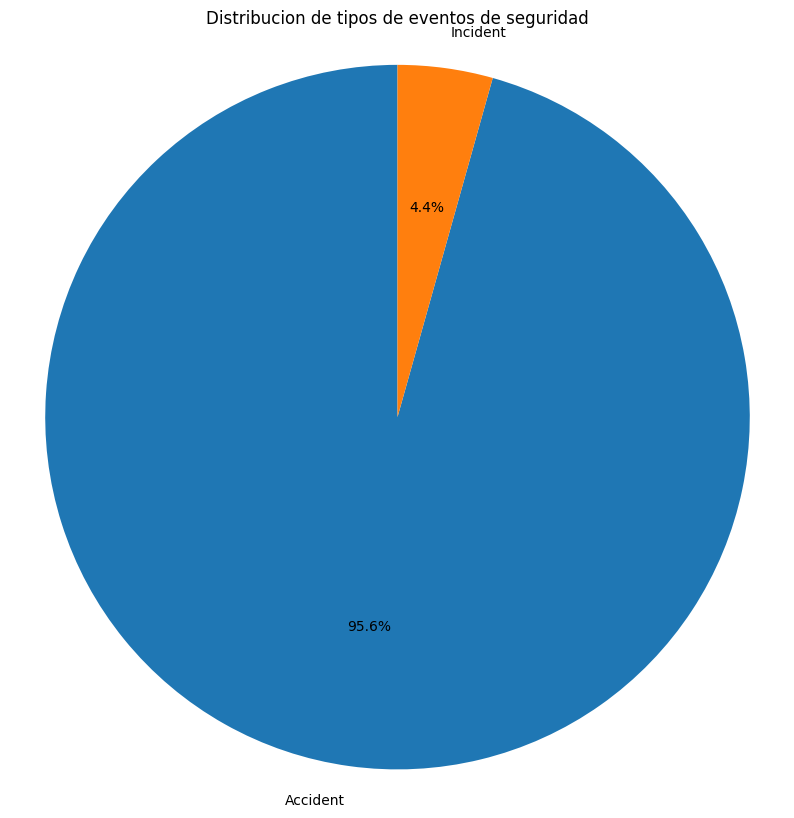

In [15]:
plt.figure(figsize =(10,10))
plt.pie(df_tipo_evento['Cantidad'], labels = df_tipo_evento['Tipo evento'], autopct='%1.1f%%', startangle=90)
plt.title('Distribucion de tipos de eventos de seguridad')
plt.axis('equal')
plt.show()

Aqui vemos como la mayoria de eventos son accidentes y el bajo numero de incidentes demuestra que la realidad no se esta viendo ya que por regla hay muchos mas incidentes que accidentes, lo que demuestra que se deben hacer campañas agresivas de cultura del reporte, ya que al poder mapear los incidentes se pueden anticipar los accidentes y asi prevenirlos.

### Vamos a ver los accidentes por años

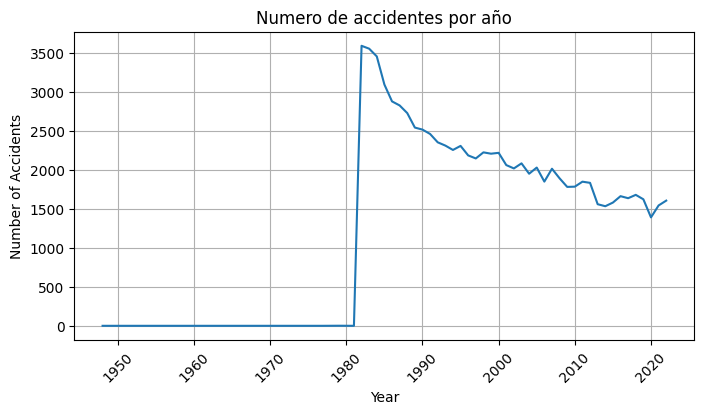

In [16]:
df1=df
df1['Event.Date'] =  pd.to_datetime(df1['Event.Date'])
df1['Year'] = df1['Event.Date'].dt.year
accidentes_anuales=df1['Year'].value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.plot(accidentes_anuales.index, accidentes_anuales.values,linestyle='-')
plt.title('Numero de accidentes por año')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Como hay pocos datos antes de 1982 nos limitamos a ver los eventos despues de 1982.

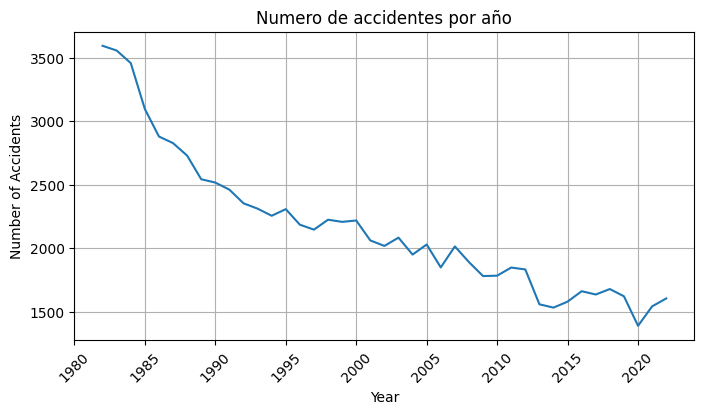

In [17]:
df1=df
df1['Event.Date'] =  pd.to_datetime(df1['Event.Date'])
df1['Year'] = df1['Event.Date'].dt.year
df2= df1[df1['Year'] >= 1982]
accidentes_anuales=df2['Year'].value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.plot(accidentes_anuales.index, accidentes_anuales.values,linestyle='-')
plt.title('Numero de accidentes por año')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

En este grafico podemos ver como la seguridad ha mejorado significativamente desde el año 1982 al presente con la toma de datos y su analisis para las operaciones aereas.Pero esta claro que todavia falta mucho por mejorar en este sentido por lo cual es mandatorio mejorar continuamente los protocolos, regulaciones, procedimientos y por encima de todo el entrenamiento de las tripulaciones para mitigar los riesgos asociados a los accidentes de aviacion.

In [18]:
df_fase_de_vuelo_cantidad_eventos = pd.DataFrame(df['Broad.phase.of.flight'].value_counts()).reset_index()
df_fase_de_vuelo_cantidad_eventos.columns = ['Fase de vuelo','Cantidad']


Text(0.5, 1.0, 'Cantidad eventos de seguridad por fase de vuelo')

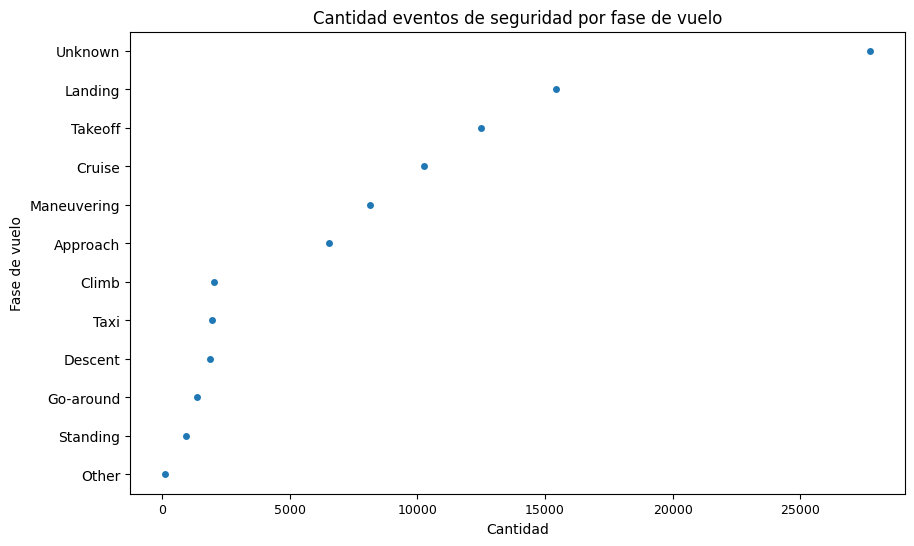

In [19]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df_fase_de_vuelo_cantidad_eventos, x='Cantidad', y='Fase de vuelo')
plt.xticks(fontsize=9)
plt.title('Cantidad eventos de seguridad por fase de vuelo')

Aca vemos con mas claridad que la mayor cantidad de eventos es en el aterrizaje y el despegue.Para las fases de vuelo de aterrizaje y despegue se deben promover programas de entrenamiento y capacitacion integral para las tripulaciones. Fomentar una cultura de alta alerta situacional en estas condiciones de vuelo es esencial para lograr un impacto significativo en la disminucion de eventos de seguridad. Las tripulaciones deben estar bien preparados y conscientes de los riesgos potenciales en todas las fases de vuelo pero haciendo un especial enfasis en el aterrizaje y despegue.

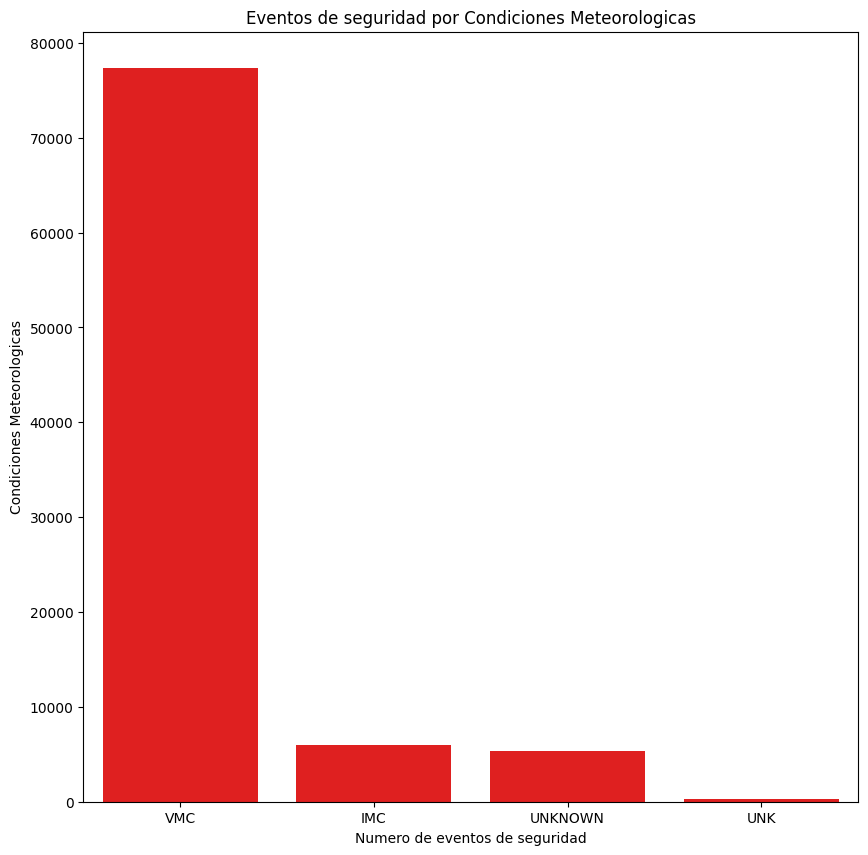

In [20]:
df['Weather.Condition']=df['Weather.Condition'].replace(['UNK'], 'UNKNOWN')
df3=df
df3['Weather.Condition'] = df3['Weather.Condition'].str.upper()
Cantidad_eventos_seguridad=df3['Weather.Condition'].value_counts().reset_index()
Cantidad_eventos_seguridad.columns = ['Condicion de vuelo', 'Eventos de seguridad']
plt.figure(figsize=(10,10))
sns.barplot(x='Condicion de vuelo', y='Eventos de seguridad', data=Cantidad_eventos_seguridad,color='red')
plt.title('Eventos de seguridad por Condiciones Meteorologicas')
plt.xlabel('Numero de eventos de seguridad')
plt.ylabel('Condiciones Meteorologicas')
plt.show()

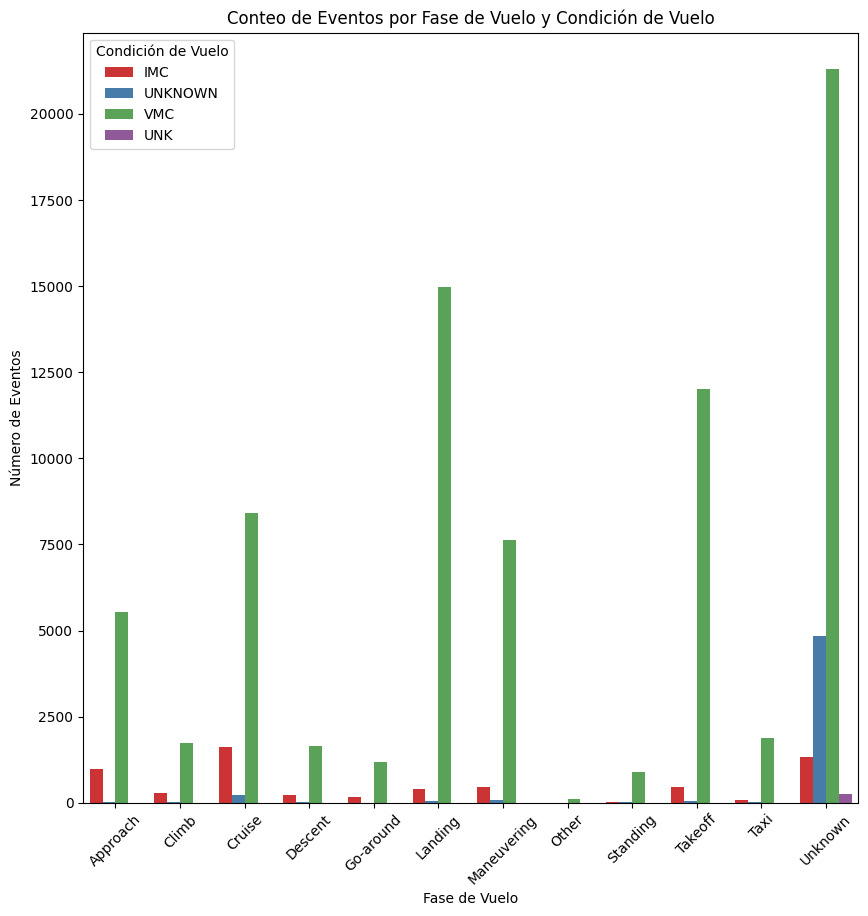

In [21]:
df3
conteo_eventos = df3.groupby(['Broad.phase.of.flight', 'Weather.Condition']).size().reset_index(name='total_eventos')
conteo_eventos.columns = ['fase_vuelo','condicion_vuelo','total_eventos']
plt.figure(figsize=(10, 10))
sns.barplot(x='fase_vuelo', y='total_eventos', hue='condicion_vuelo', data=conteo_eventos, palette='Set1')
plt.title('Conteo de Eventos por Fase de Vuelo y Condición de Vuelo')
plt.xlabel('Fase de Vuelo')
plt.ylabel('Número de Eventos')
plt.legend(title='Condición de Vuelo')
plt.xticks(rotation=45)
plt.show()

Las mayoria de los accidentes ocurren en buenas condiciones climaticas. Incluso visualizando cada fase de vuelo individualmente. En estas condiciones, los pilotos pueden volverse complacientes y confiados, asumiendo que hay menos riesgos en comparacion con los vuelos en condiciones meteorologicas adversas. Esto puede llevar a que tomen una actitud relajada hacia los protocolos de seguridad y a comportamientos potencialmente arriesgados, como a aproximaciones desestabilizadas, bajarse de los minimos o no respetar estrictamente las indicaciones del control de trafico aereo, lo que proporcionalmente aumenta la probabilidad de eventos de seguridad. Para combatir esta problematica se deben promover campañas de elevar la alerta situacional en situaciones climaticas favorables enfatizando en nunca confiarse cuando se esta al mando de una aeronave como tripulacion y alentar a las tripulaciones en todo momento a seguir estrictamente los procedimientos de operacion normal establecidos por cada aerolinea y las normativas establecidas en cada zona de trafico aereo.

In [22]:
resultado = df.groupby('Broad.phase.of.flight').agg(
    Total_fatalidades=('Total.Fatal.Injuries', 'sum'),
    Total_serious_injuries=('Total.Serious.Injuries', 'sum')
).reset_index()
resultado['Total lesionados y muertos'] = resultado['Total_fatalidades'] + resultado['Total_serious_injuries']
resultado

,Broad.phase.of.flight,Total_fatalidades,Total_serious_injuries,Total lesionados y muertos
0,Approach,3842.0,1920.0,5762.0
1,Climb,1762.0,606.0,2368.0
2,Cruise,6173.0,2183.0,8356.0
3,Descent,913.0,473.0,1386.0
4,Go-around,587.0,388.0,975.0
5,Landing,518.0,1234.0,1752.0
6,Maneuvering,5323.0,1912.0,7235.0
7,Other,85.0,13.0,98.0
8,Standing,161.0,241.0,402.0
9,Takeoff,4304.0,3138.0,7442.0


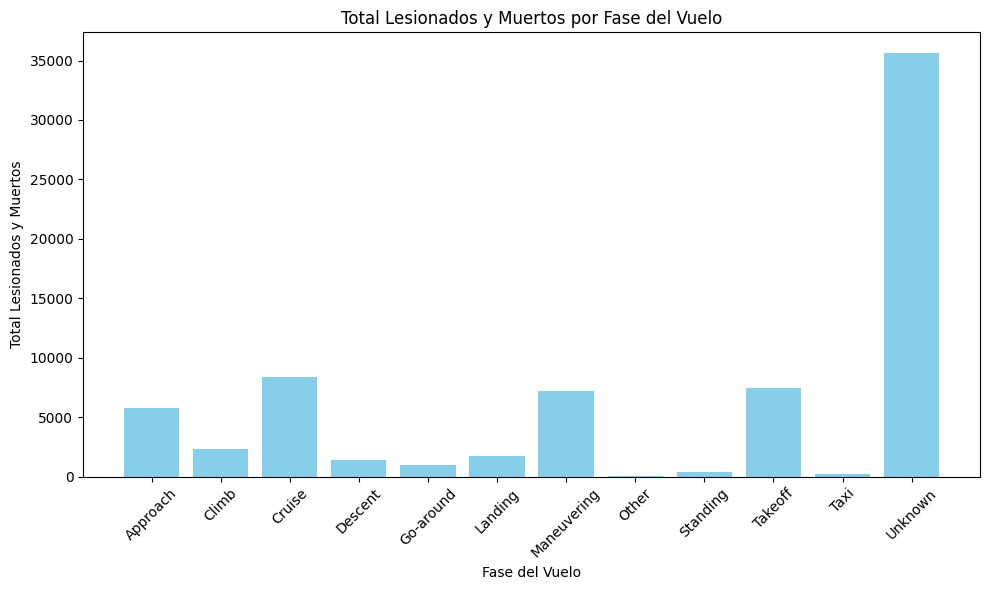

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(resultado['Broad.phase.of.flight'], resultado['Total lesionados y muertos'], color='skyblue')

plt.xlabel('Fase del Vuelo')
plt.ylabel('Total Lesionados y Muertos')
plt.title('Total Lesionados y Muertos por Fase del Vuelo')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()
plt.close()


Se puede observar que si vemos las fatalidades y heridos de gravedad por fase de vuelo, las fases de vuelo que mas de estos eventos presentan son crucero, maniobras, aproximacion y despegue, por lo que si las compañias quieren reducir drasticamente el numero de heridos de seriedad y fatalidades se deben enfocar los esfuerzos de prevencion denotados en las otras secciones hacia estas fases de vuelo. Teniendo en cuenta que el despegue al ser muy parecido del aterrizaje puede estar teniendo mas fatalidades por la cantidad de combustible en la aeronave cuando sucede el evento de seguridad. Por lo que se debe alentar en seguir mejorando el entrenamiento de los bomberos aeroportuarios para atender estos eventos y poder controlar los incendios y asi reducir el numero de fatalidades y heridos de gravedad durante el despegue.

Concluimos de acuerdo a los textos mas arriba que hay una pluralidad de campos para trabajar y lograr mejoras significativas en cuanto a la seguridad aerea y asi reducir la cantidad de eventos de seguridad, centrandose en fases de vuelo y condiciones de vuelo especificas, lo que permite centralizar los esfuerzos de entrenamiento y aumento de la alerta situacional en estas fases de vuelo y en las condiciones de vuelo vistas como mas criticas.

In [24]:
df_numerico = df.select_dtypes(include=['number'])
matriz_correlacion = df_numerico.corr()


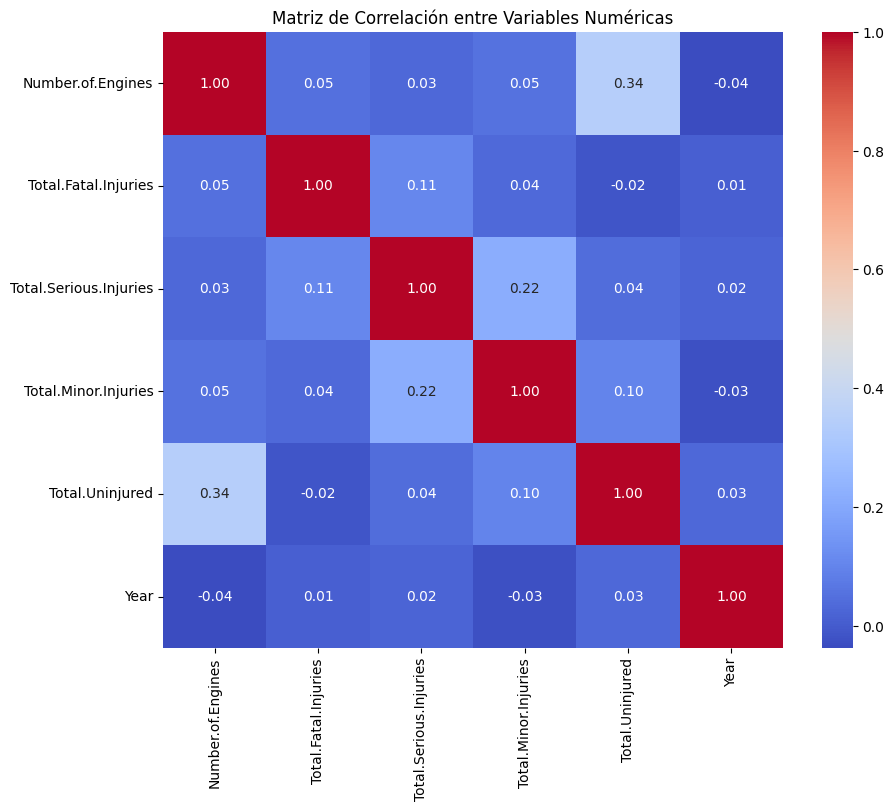

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

In [26]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Year'],
      dtype='object')

In [68]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(df1[['Broad.phase.of.flight']])

# Convertir el resultado a un DataFrame y contar accidentes
encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Broad.phase.of.flight']))
df_encoded = pd.concat([df1, encoded_df], axis=1)

# Contar la cantidad de accidentes por fase de vuelo
counts = encoded_df.sum()
print("Cantidad de accidentes por fase de vuelo:\n", counts)


Cantidad de accidentes por fase de vuelo:
 Broad.phase.of.flight_Approach        6546.0
Broad.phase.of.flight_Climb           2034.0
Broad.phase.of.flight_Cruise         10269.0
Broad.phase.of.flight_Descent         1887.0
Broad.phase.of.flight_Go-around       1353.0
Broad.phase.of.flight_Landing        15428.0
Broad.phase.of.flight_Maneuvering     8144.0
Broad.phase.of.flight_Other            119.0
Broad.phase.of.flight_Standing         945.0
Broad.phase.of.flight_Takeoff        12493.0
Broad.phase.of.flight_Taxi            1958.0
Broad.phase.of.flight_Unknown        27713.0
dtype: float64


In [69]:
# Vamos a eliminar los unknown
df_limpio = df1[df1['Broad.phase.of.flight'] != 'Unknown']
df_limpio['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Other            119
Name: count, dtype: int64

In [70]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(df_limpio[['Broad.phase.of.flight']])

# Convertir el resultado a un DataFrame y contar accidentes
encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Broad.phase.of.flight']))
df_encoded = pd.concat([df_limpio, encoded_df], axis=1)

# Contar la cantidad de accidentes por fase de vuelo
counts = encoded_df.sum()
print("Cantidad de accidentes por fase de vuelo:\n", counts)

Cantidad de accidentes por fase de vuelo:
 Broad.phase.of.flight_Approach        6546.0
Broad.phase.of.flight_Climb           2034.0
Broad.phase.of.flight_Cruise         10269.0
Broad.phase.of.flight_Descent         1887.0
Broad.phase.of.flight_Go-around       1353.0
Broad.phase.of.flight_Landing        15428.0
Broad.phase.of.flight_Maneuvering     8144.0
Broad.phase.of.flight_Other            119.0
Broad.phase.of.flight_Standing         945.0
Broad.phase.of.flight_Takeoff        12493.0
Broad.phase.of.flight_Taxi            1958.0
dtype: float64


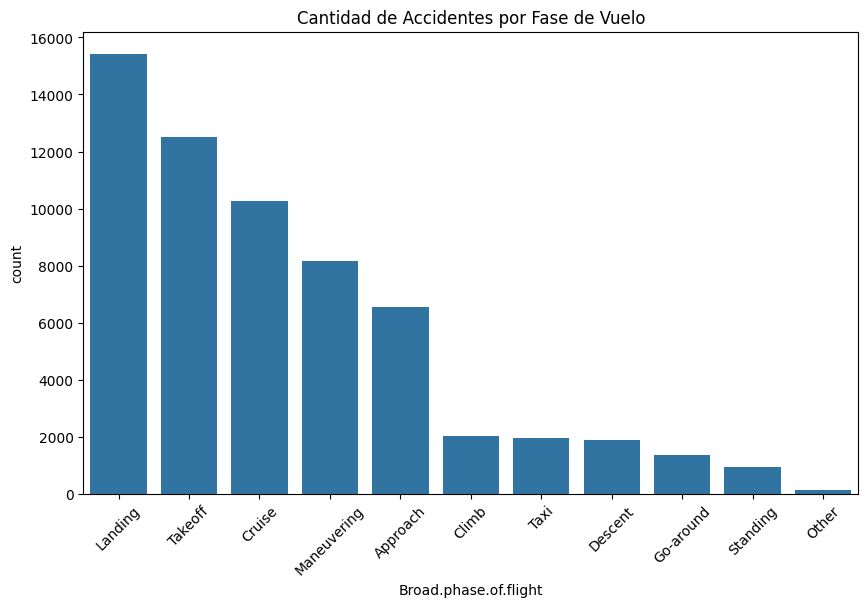

In [71]:
# Visualizar nuevamente la cantidad de accidentes por fase de vuelo
plt.figure(figsize=(10, 6))
sns.countplot(data=df_limpio, x='Broad.phase.of.flight', order=df_limpio['Broad.phase.of.flight'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Cantidad de Accidentes por Fase de Vuelo')
plt.show()


In [72]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Year', 'Fase_de_vuelo_encoded'],
      dtype='object')

In [73]:
# Codificar la variables objetivos con LabelEncoder

# Seleccionar las dos columnas categóricas que deseas codificar
columnas_categoricas = ['Broad.phase.of.flight', 'Weather.Condition']

# Crear el OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Ajustar y transformar las columnas seleccionadas
encoded = one_hot_encoder.fit_transform(df_limpio[columnas_categoricas])

# Convertir a DataFrame
encoded_df = pd.DataFrame(encoded, columns=one_hot_encoder.get_feature_names_out(columnas_categoricas))

# Concatenar el DataFrame original con el codificado
df_encoded = pd.concat([df_limpio.drop(columnas_categoricas, axis=1), encoded_df], axis=1)

# Mostrar las primeras filas para verificar
print(df_encoded.head())


         Event.Id Investigation.Type Event.Date         Location  \
0  20001218X45444           Accident 1948-10-24  MOOSE CREEK, ID   
2  20061025X01555           Accident 1974-08-30    Saltville, VA   
3  20001218X45448           Accident 1977-06-19       EUREKA, CA   
4  20041105X01764           Accident 1979-08-02       Canton, OH   
5  20170710X52551           Accident 1979-09-17       BOSTON, MA   

         Country Injury.Severity Aircraft.damage               Make  Model  \
0  United States        Fatal(2)       Destroyed            Stinson  108-3   
2  United States        Fatal(3)       Destroyed             Cessna   172M   
3  United States        Fatal(2)       Destroyed           Rockwell    112   
4  United States        Fatal(1)       Destroyed             Cessna    501   
5  United States       Non-Fatal     Substantial  Mcdonnell Douglas    DC9   

   Number.of.Engines  ... Broad.phase.of.flight_Descent  \
0                1.0  ...                           0.0   
2   

In [74]:
# Seleccionar solo las columnas numéricas
df_numerico = df_encoded.select_dtypes(include=['number'])

# Verificar que el DataFrame contiene únicamente columnas numéricas
print(df_numerico.head())


   Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
0                1.0                   2.0                     0.0   
2                1.0                   3.0                     0.0   
3                1.0                   2.0                     0.0   
4                1.0                   1.0                     2.0   
5                2.0                   0.0                     0.0   

   Total.Minor.Injuries  Total.Uninjured    Year  Fase_de_vuelo_encoded  \
0                   0.0              0.0  1948.0                    2.0   
2                   0.0              1.0  1974.0                    2.0   
3                   0.0              0.0  1977.0                    2.0   
4                   0.0              0.0  1979.0                    0.0   
5                   1.0             44.0  1979.0                    1.0   

   Broad.phase.of.flight_Climb  Broad.phase.of.flight_Cruise  \
0                          0.0                           1.0   


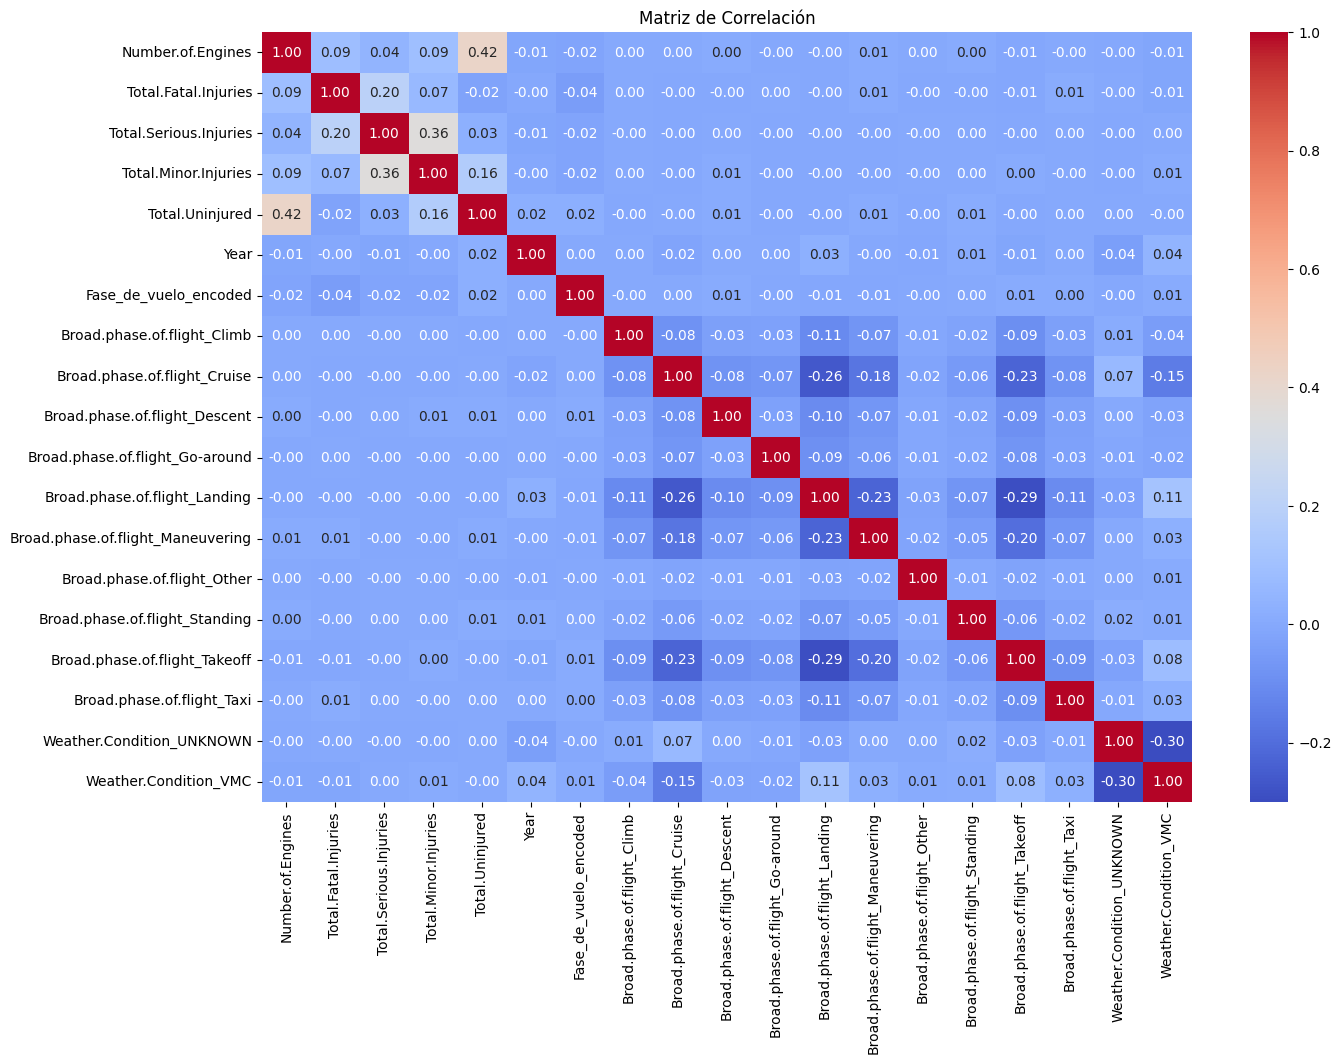

In [75]:
# Calcular la matriz de correlación
correlation_matrix = df_numerico.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlación')
plt.show()

In [76]:
df_numerico.columns

Index(['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Year',
       'Fase_de_vuelo_encoded', 'Broad.phase.of.flight_Climb',
       'Broad.phase.of.flight_Cruise', 'Broad.phase.of.flight_Descent',
       'Broad.phase.of.flight_Go-around', 'Broad.phase.of.flight_Landing',
       'Broad.phase.of.flight_Maneuvering', 'Broad.phase.of.flight_Other',
       'Broad.phase.of.flight_Standing', 'Broad.phase.of.flight_Takeoff',
       'Broad.phase.of.flight_Taxi', 'Weather.Condition_UNKNOWN',
       'Weather.Condition_VMC'],
      dtype='object')

In [78]:
df_numerico = df_numerico.dropna(axis=0)
df_numerico = df_numerico.dropna(axis=1)
df_numerico.info

<bound method DataFrame.info of        Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
0                    1.0                   2.0                     0.0   
2                    1.0                   3.0                     0.0   
3                    1.0                   2.0                     0.0   
4                    1.0                   1.0                     2.0   
5                    2.0                   0.0                     0.0   
...                  ...                   ...                     ...   
61170                1.0                   0.0                     0.0   
61171                1.0                   0.0                     0.0   
61172                1.0                   0.0                     0.0   
61173                1.0                   0.0                     0.0   
61175                1.0                   0.0                     0.0   

       Total.Minor.Injuries  Total.Uninjured    Year  Fase_de_vuelo_encoded  \


In [79]:
# Preparación de datos para el modelo
modelo = df_numerico.drop('Broad.phase.of.flight_Takeoff', axis=1)
X = df_numerico.drop('Broad.phase.of.flight_Takeoff', axis=1)
y = df_numerico['Broad.phase.of.flight_Takeoff']

In [80]:
X

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Fase_de_vuelo_encoded,Broad.phase.of.flight_Climb,Broad.phase.of.flight_Cruise,Broad.phase.of.flight_Descent,Broad.phase.of.flight_Go-around,Broad.phase.of.flight_Landing,Broad.phase.of.flight_Maneuvering,Broad.phase.of.flight_Other,Broad.phase.of.flight_Standing,Broad.phase.of.flight_Taxi,Weather.Condition_UNKNOWN,Weather.Condition_VMC
0,1.0,2.0,0.0,0.0,0.0,1948.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,3.0,0.0,0.0,1.0,1974.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2.0,0.0,0.0,0.0,1977.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,2.0,0.0,0.0,1979.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,2.0,0.0,0.0,1.0,44.0,1979.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61170,1.0,0.0,0.0,0.0,1.0,2006.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
61171,1.0,0.0,0.0,0.0,3.0,2006.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61172,1.0,0.0,0.0,1.0,1.0,2006.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
61173,1.0,0.0,0.0,1.0,1.0,2006.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [81]:
# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo de Regresión Logística
logreg = LogisticRegression(max_iter=200)#arbol de decision

In [83]:
# Eliminar filas con NaN en X_train
X_train_clean = X_train.dropna()

# Eliminar las filas correspondientes en y_train
y_train_clean = y_train[X_train_clean.index]

logreg = LogisticRegression(max_iter=10000)
# Ajustar el modelo con los datos limpios
selector = RFE(logreg, n_features_to_select=2)
selector = selector.fit(X_train_clean, y_train_clean)


In [84]:
X.columns

Index(['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Year',
       'Fase_de_vuelo_encoded', 'Broad.phase.of.flight_Climb',
       'Broad.phase.of.flight_Cruise', 'Broad.phase.of.flight_Descent',
       'Broad.phase.of.flight_Go-around', 'Broad.phase.of.flight_Landing',
       'Broad.phase.of.flight_Maneuvering', 'Broad.phase.of.flight_Other',
       'Broad.phase.of.flight_Standing', 'Broad.phase.of.flight_Taxi',
       'Weather.Condition_UNKNOWN', 'Weather.Condition_VMC'],
      dtype='object')

In [85]:
# Entrenamiento del modelo con características seleccionadas
logreg.fit(X_train, y_train)

# Predicción y evaluación
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8996763754045307
Confusion Matrix:
 [[12407  1625]
 [  142  3439]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.88      0.93     14032
         1.0       0.68      0.96      0.80      3581

    accuracy                           0.90     17613
   macro avg       0.83      0.92      0.86     17613
weighted avg       0.93      0.90      0.91     17613



# Conclusion del modelo.
El modelo tiene un buen accuracy total, pero se enfrenta a un desbalance en el rendimiento entre las dos clases. La clase 1.0 (minoría) tiene una tasa de falsos positivos más alta, lo que reduce la precisión.